In [44]:
import matplotlib.pyplot as plt
import pandas as pd


def add_labels(x_list, y_list, labels):
    for x, y, label in zip(x_list,y_list, labels):
        plt.text(x+0.25,y+0.25,label)

notes = pd.read_csv("data/notes.txt",sep='\s+')
notes

,math,scie,fran,lati,d-m
jean,6.0,6.0,5.0,5.5,8
alin,8.0,8.0,8.0,8.0,9
anni,6.0,7.0,11.0,9.5,11
moni,14.5,14.5,15.5,15.0,8
didi,14.0,14.0,12.0,12.5,10
andr,11.0,10.0,5.5,7.0,13
pier,5.5,7.0,14.0,11.5,10
brig,13.0,12.5,8.5,9.5,12
evel,9.0,9.5,12.5,12.0,18


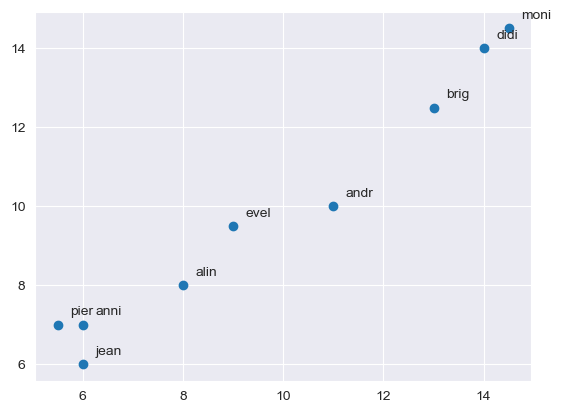

In [35]:
plt.scatter(notes.math,notes.scie)
add_labels(notes.math,notes.scie,notes.index)

<Axes: xlabel='variable', ylabel='value'>

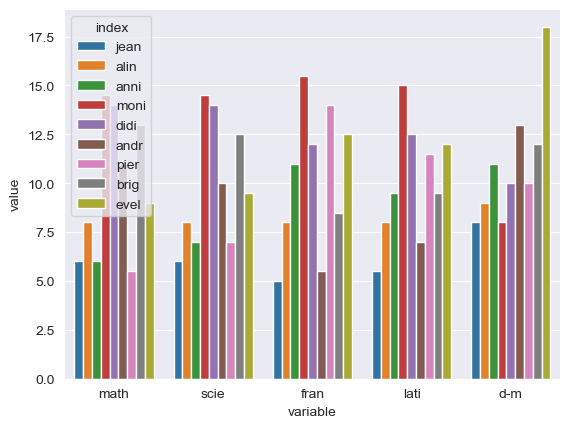

In [54]:
import seaborn as sns
notes0=notes.reset_index()
# notes0
notes_melt=notes0.melt(id_vars=["index"])
# notes_melt
# sns.barplot(data=notes_melt,x="index",y="value",hue="variable")
sns.barplot(data=notes_melt,x="variable",y="value",hue="index")

<Axes: >

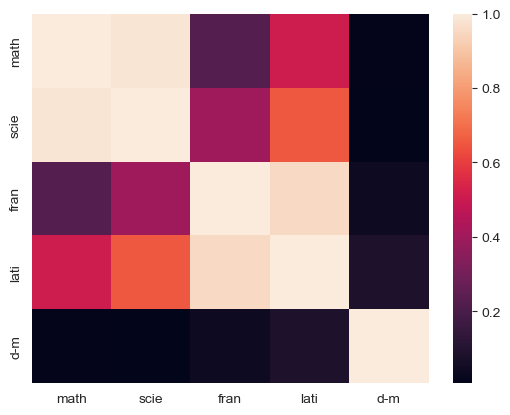

In [55]:
corr = notes.corr()
sns.heatmap(corr)

<Axes: xlabel='value', ylabel='variable'>

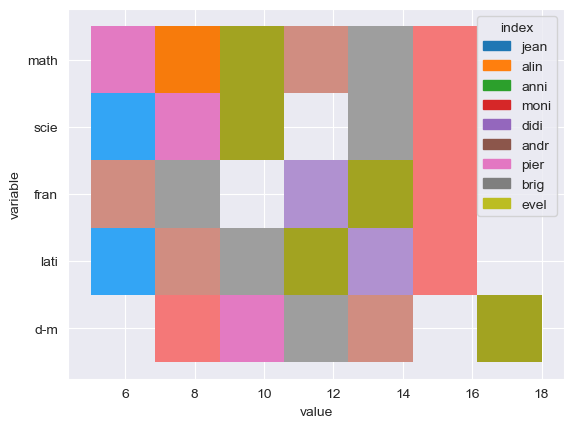

In [61]:
sns.histplot(data=notes_melt,x=notes_melt.value,y="variable",hue="index")

In [ ]:
plt.scatter((notes.math+notes.scie)/2,(notes.fran+notes.lati)/2)
add_labels((notes.math+notes.scie)/2,(notes.fran+notes.lati)/2,notes.index)
plt.plot([5,15],[10,10])
plt.plot([10,10],[5,15])

In [76]:
import numpy as np
Xc= notes[['math','scie','fran','lati','d-m']].to_numpy()
C = np.cov(Xc,bias=True,rowvar=False)
np.diag(C).sum()

48.97530864197531

In [75]:
import numpy.linalg as linalg
A1 = np.array([[0.5, 0, 0.5, 0, 0],
              [0.5, 0 , -0.5, 0, 0],
              [0, 0.5, 0, 0.5, 0],
              [0, 0.5, 0, -0.5, 0],
              [0, 0, 0, 0, 1]])
C1 = np.cov(Xc @ linalg.inv(A1).T,bias=True,rowvar=False)
np.diag(C1).sum()

89.28395061728395

In [ ]:
B1 = np.array([[np.sqrt(2)/2, 0, np.sqrt(2)/2, 0, 0],
               [np.sqrt(2)/2, 0 , -np.sqrt(2)/2, 0, 0],
               [0, np.sqrt(2)/2, 0, np.sqrt(2)/2, 0],
               [0, np.sqrt(2)/2, 0, -np.sqrt(2)/2, 0],
               [0, 0, 0, 0, 1]])